<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h3><center>Andrey Shetakov (<a href="mailto:avshestakov@hse.ru">avshestakov@hse.ru</a>)</center></h3>
<hr>
<h2><center>Linear regression. Gradient-based optimization<sup><a href="#fn1" id="ref1">1</a></sup></center></h2>



<sup id="fn1">1. Some materials are taken from <a href="http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D1%80%D0%B0%D1%81%D0%BF%D0%BE%D0%B7%D0%BD%D0%B0%D0%B2%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2_%28%D0%BA%D1%83%D1%80%D1%81_%D0%BB%D0%B5%D0%BA%D1%86%D0%B8%D0%B9%2C_%D0%92.%D0%92.%D0%9A%D0%B8%D1%82%D0%BE%D0%B2%29">machine learning course of Victor Kitov</a></sup>

In [6]:
%matplotlib inline

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (12,8)

# Для кириллицы на графиках
font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

try:
    from ipywidgets import interact, IntSlider, fixed, FloatSlider
except ImportError:
    print(u'Так надо')
    
import warnings
warnings.filterwarnings('ignore')

# Let's recall previous lecture

* Decision trees
    * Utilize the notion of impurity
    * Work both for classification and regression
* Implicit feature selection
    * good for features of different nature
* Parallel to axes class separating boundary
* Local greedy optimizaion
* Sensitive to even tiny data pertubations

# Linear regression

<center><img src='img/linear-meme.jpg' width=500></center>

In [8]:
df_auto = pd.read_csv('./data/accord_sedan_training.csv')

## Regression 2

<center><img src='img/example1.png' width=700></center>

* Obviously, those characteristics somehow relate with price ($f: X \rightarrow Y$)
* Formalize a model to predict flat price: 
    $$a(x) = a(total\_area, nmbr\_of\_bedrooms, house\_age) = \hat{y}$$
* Let it be a linear model:
    $$a(x) = \beta_0 + \beta_1\cdot total\_area + \beta_2 \cdot nmbr\_of\_bedrooms + \beta_3 \cdot house\_age$$
* Learning - find coefficients $\beta_0,\dots, \beta_3$, that minimizer error on training set

## Cars price vs mileage

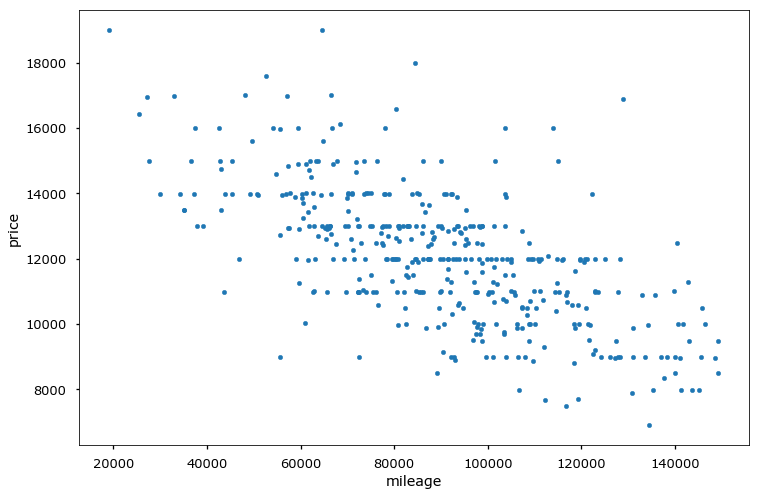

In [9]:
df_auto.plot(x='mileage', y='price', kind='scatter')


## Linear regression

* Our goal - determine **linear** dependence between features $X$ and target vector $y$
* Define $x_n^d$ as $d$-th feature of $n$-th object, $y_{n} \in \mathbb{R}$ - target value
for $n$-th object
$$f(x_{n}, \beta) = \hat{y}_{n} = \beta_0 + \beta_1x_{n}^1 + \dots$$
* $x_{n}^0 = 1$ $\forall n$ - intercept
* Need to estimate $\beta_i$.

Ordinary Lears Squares:
$$ L(\beta_0,\beta_1,\dots) = \frac{1}{2N}\sum^{N}_{n=1}(\hat{y}_{n} - y_{n})^2 = \frac{1}{2N}\sum^{N}_{n=1}\left(\sum_{d=0}^{D}\beta_{d}x_{n}^{d}-y_{n}\right)^{2}  \rightarrow \min\limits_{\beta} $$

## Solution

Let's say $f(x, \beta) = \beta_0 + \beta_1x_1$

Calculate partial derivatives wrt $\beta_0$, $\beta_1$ and set them to $0$:

$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{N}\sum^{N}_{n=1}(\beta_0 + \beta_1x_{n}^1 - y_{n}) = 0$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{N}\sum^{N}_{n=1}(\beta_0 + \beta_1x_{n}^1 - y_{n})x^1_{n} = 0$$


## Linear regression (in matrix form)

* Define $X\in\mathbb{R}^{NxD},\{X\}_{ij}$ defines the $j$-th feature of $i$-th object, $y\in\mathbb{R}^{n}$ - vector with target values
$$f(x, \beta) = \hat{y} = X\beta \quad \Leftrightarrow \quad
\left( \begin{array}{c}
\hat{y}_1 \\
\hat{y}_2 \\
\vdots \\
\hat{y}_n \end{array} \right) = 
\left( \begin{array}{ccccc}
1 & x_1^1 & x_1^2 & \cdots & x_1^d\\
1 & x_2^1 & x_2^2 & \cdots & x_2^d\\
\cdots & \cdots & \cdots & \cdots & \cdots\\
1 & x_n^1 & x_n^2 & \cdots & x_n^d\end{array} \right) \cdot 
\left( \begin{array}{c}
\beta_0 \\
\beta_1 \\
\vdots\\
\beta_d \end{array} \right)
$$
* Need to estimate $\beta_i$.

Ordinary Lears Squares:
$$ L(\beta) = \frac{1}{2N}(\hat{y} - y)^{\top}(\hat{y} - y) = \frac{1}{2N}(X\beta - y)^{\top}(X\beta - y) \rightarrow \min\limits_{\beta} $$


## Solution (in matrix form)

Expand a bit
$$ 
\begin{align*} 
L(\beta) & = \frac{1}{2N}(X\beta - y)^{\top}(X\beta - y) \\
         & = \frac{1}{2N}\left( \beta^\top X^\top X \beta - 2 (X\beta)^\top y + y^\top y \right)
\end{align*} 
$$

Calculate vector of partial derivatives - gradient

$$
\begin{align*} 
\nabla L(\beta) = \left(\frac{\partial L(\beta)}{\partial\beta_i} \right)_{i=0\dots d} & = \frac{1}{2N}\left(2X^\top X \beta -2X^\top y\right) = 0 \\
X^{\top}X\beta-X^{T}y & = 0 \\
\\
\beta & = (X^\top X)^{-1} X^\top y \quad\text{(Normal Equation)}
\end{align*}
$$

* [Matrix Calculus](http://eli.thegreenplace.net/2015/the-normal-equation-and-matrix-calculus/)
* [Matrix Cookbook](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf)

## Comments
* This is the global minimum, because the optimized criteria is convex.
* Geometric interpretation:
    * find linear combination of feature measurements that best reproduce $y$
    * solution - combinaton of features, giving projection of $y$ on linear span of feature measurements.

* Why using Normal Equation could be bad?
    * Calculating inverse costs a lot
    * Not all matrices have it (singular matrices)

## Linearly dependent features (multicollinearity)

* Solution $\widehat{\beta}=(X^{T}X)^{-1}X^{T}y$ exists when $X^{T}X$ is non-singular
* Problem occurs when one of the features is a linear combination of the other (linear dependency)
    * interpretation: non-identifiability of $\widehat{\beta}$ for linearly dependent features:
        * linear dependence: $\exists\alpha:\,x^{T}\alpha=0\,\forall x$
        * suppose $\beta$ solves linear regression $y=x^{T}\beta$
        * then $x^{T}\beta\equiv x^{T}\beta+kx^{T}\alpha\equiv x^{T}(\beta+k\alpha)$, so $\beta+k\alpha$ is also a solution! 
* Multicollinearity can be exact and not exact, which is also bad

## Examples of linear dependency
* $x$ miles $\approx 1.6\cdot x$ kms
* total flat area $\approx$ area of living rooms $+$ area of kitchen
* dummy variable trap!

## Linearly dependent features
* Problem may be solved by: 
     * feature selection
     * dimensionality reduction
     * imposing additional requirements on the solution (regularization) 

## Analysis of linear regression

**Advantages:**

* single optimum, which is global (for non-singular matrix)
* analytical solution
* interpretable solution and algorithm

**Drawbacks:**
* too simple model assumptions (may not be satisfied)
* $X^{T}X$ should be non-degenerate (and well-conditioned)

# Optimization methods for LR
## Gradient descent

In [12]:
from mpl_toolkits import mplot3d

def sq_loss_demo():

    beta0 = np.linspace(-8000, 6500, 100)
    beta1 = np.linspace(5000, 20000, 100)

    x = df_auto.loc[:, ['mileage']]
    x = (x-x.mean(axis=0))/x.std(axis=0)
    X = np.c_[x, np.ones(df_auto.shape[0])]


    B0, B1 = np.meshgrid(beta0, beta1)
    L = ((X.dot(np.r_[B0.reshape(1,-1), B1.reshape(1,-1)]) - df_auto.loc[:, 'price'].values.reshape(-1,1))**2).sum(axis=0)/(2*df_auto.shape[0])

    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    ax.view_init(40, 25)
    ax.plot_surface(B0, B1, L.reshape(B0.shape), alpha=0.3,)
    # ax.plot_(X, Y, Z)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')

    ax = fig.add_subplot(1, 2, 2)
    contour = ax.contour(B0, B1, L.reshape(B0.shape),)
    plt.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    
    plt.show()

## Intuition

$$ L(\beta_0, \beta_1) = \frac{1}{2N}\sum_{n=1}^N(\beta_0 + \beta_1x^1_{n} - y_{n})^2$$ 

* Suppose we have some initial approximation of $(\hat{\beta_0}, \hat{\beta_1})$
* How should we change it in order to improve?

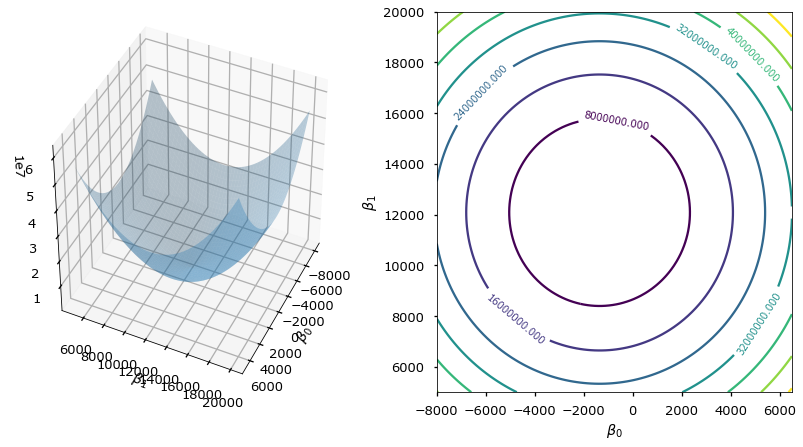

In [13]:
sq_loss_demo()

## Tiny Refresher

Derivative of $f(x)$ in $x_0$:
$$ f'(x_0) = \lim\limits_{h \rightarrow 0}\frac{f(x_0+h) - f(x_0)}{h}$$

Derivative shows the slope of tangent line in $x_0$

* If $x_0$ is extreme point of $f(x)$ and $f'(x_0)$ exists $\Rightarrow$ $f'(x_0) = 0$

In [26]:
def deriv_demo(h, x0):

    x = np.linspace(0.01, 20, 100)
    f = lambda x: np.sin(x/2)/x

    deriv = (f(x0+h) - f(x0))/h

    tang = lambda x:  f(x0) + deriv*(x - x0)
    
    plt.plot(x, f(x), label='$f(x)$')
    ylim = plt.ylim()

    plt.plot(x,tang(x), label='tangent line (deriv = %f)'%deriv)

    plt.scatter(x0, f(x0), marker='s', s=100)
    plt.scatter(x0+h, f(x0+h), marker='s', s=100)

    plt.ylim(ylim)
    
    plt.legend()
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$')
    
    plt.show()


In [27]:
interact(deriv_demo, h=FloatSlider(min=0.0001, max=2, step=0.005), x0=FloatSlider(min=1, max=15, step=.2))

interactive(children=(FloatSlider(value=0.0001, description='h', max=2.0, min=0.0001, step=0.005), FloatSlider…

<function __main__.deriv_demo>

## Tiny Refresher

* In multidimential world we switch to gradients and directional derivatives:
$$ f'_v(x_0) = \lim\limits_{h \rightarrow 0}\frac{f(x_0+hv) - f(x_0)}{h} = \frac{d}{dh}f(x_{0,1} + hv_1, \dots, x_{0,d} + hv_d) \rvert_{h=0}, \quad ||v|| = 1 \quad \text{directional derivatives}$$


$$ \frac{ \partial f(x_1,x_2,\dots,x_d)}{\partial x_i} = \lim\limits_{h \rightarrow 0}\frac{f(x_1, x_2, \dots, x_i + h, \dots, x_d) - f(x_1, x_2, \dots, x_i, \dots, x_d)}{h} \quad \text{partial derivative}$$

$$ \nabla f = \left(\frac{\partial f}{\partial x_i}\right),\quad i=1\dots d  \quad \text{Gradient = a vector of partial derivatives}$$

## Tiny Refresher
* Unsing multivariate chain rule:

$$ f'_v(x_0) = \frac{d}{dh}f(x_{0,1} + hv_1, \dots, x_{0,d} + hv_d) \rvert_{h=0} = \sum_{i=1}^d \frac{\partial f}{\partial x_i} \frac{d}{dh} (x_{0,i} + hv_i) = \langle \nabla f, v \rangle$$

$$ \langle \nabla f, v \rangle = || \nabla f || \cdot ||v|| \cdot \cos{\phi} = || \nabla f || \cdot \cos{\phi}$$

## Tiny Refresher
   
$$ \langle \nabla f, v \rangle = || \nabla f || \cdot \cos{\phi}$$

* Directional derivative is maximal what direction is collinear to gradient
* gradient — direction of steepest ascent of $f(x)$
* antigradient — direction of steepest descent of $f(x)$

<center><img src='img/dir-der.gif'></center>

Given $L(\beta_0, \beta_1)$ calculate gradient (patial derivatives)
$$ \frac{\partial L}{\partial \beta_0} = \frac{1}{N}\sum^{N}_{i=1}(\beta_0 + \beta_1x_{n}^1 - y^{n})$$
$$ \frac{\partial L}{\partial \beta_1} = \frac{1}{N}\sum^{N}_{i=1}(\beta_0 + \beta_1x_{n}^1 - y^{n})x^1_{n}$$

Or in matrix form:
$$ \nabla_{\beta}L(\beta) = \frac{1}{N} X^\top(X\beta - y)$$

Run gradient update, which is  **simultaneous(!!!)** update of $\beta$ in antigradient direction:

$$ \beta := \beta - \alpha\nabla_{\beta}L(\beta)$$

* $\alpha$ -  descent "speed"


## Pseudocode

```{python}
1.function gd(X, alpha, epsilon):

2. 	initialise beta 

3. 	do: 

4.      Beta = new_beta

5.      new_Beta = Beta - alpha*grad(X, beta)

6.	until dist(new_beta, beta) < epsilon

7.	return beta
```

In [31]:
from sklearn.utils import shuffle

def grad_demo(iters=1, alpha=0.001):
    
    beta0 = np.linspace(-8000, 6500, 100)
    beta1 = np.linspace(5000, 20000, 100)

    x = df_auto.loc[:, ['mileage']]
    x = (x-x.mean(axis=0))/x.std(axis=0)
    y = df_auto.loc[:, 'price'].values
    X = np.c_[x, np.ones(df_auto.shape[0])]


    B0, B1 = np.meshgrid(beta0, beta1)
    L = ((X.dot(np.r_[B0.reshape(1,-1), B1.reshape(1,-1)]) - y.reshape(-1,1))**2).sum(axis=0)/(2*df_auto.shape[0])

    fig = plt.figure(figsize=(14, 7))
    ax = fig.add_subplot(1, 2, 1)
    ax.scatter(X[:,0], y)
    
    Beta, costs, Betas = gradient_descent_upd(X, y, alpha, tol=10**-3, max_iter=iters)
    Betas = np.c_[Betas]
    
    X_1 = np.sort(X, axis=0)
    
    y_hat = X_1.dot(Betas.T)
    
    plt.plot(X_1[:,0], y_hat)
    ax = fig.add_subplot(1, 2, 2)
    contour = ax.contour(B0, B1, L.reshape(B0.shape),)
    plt.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    
    ax.plot(Betas[:,0], Betas[:, 1], '*-')
    
    plt.show()
    
    
def stoch_grad_demo(iters=1, alpha=0.001):
    
    beta0 = np.linspace(-8000, 6500, 100)
    beta1 = np.linspace(5000, 20000, 100)

    x = df_auto.loc[:, ['mileage']]
    x = (x-x.mean(axis=0))/x.std(axis=0)
    y = df_auto.loc[:, 'price'].values
    X = np.c_[x, np.ones(df_auto.shape[0])]


    B0, B1 = np.meshgrid(beta0, beta1)
    L = ((X.dot(np.r_[B0.reshape(1,-1), B1.reshape(1,-1)]) - y.reshape(-1,1))**2).sum(axis=0)/(2*df_auto.shape[0])

    fig = plt.figure(figsize=(14, 7))    
    Beta, costs, Betas = gradient_descent_upd(X, y, alpha, tol=10**-3, max_iter=iters)
    Betas = np.c_[Betas]
    
    _, _, Betas_stoch = stoch_gradient_descent(X, y, alpha, max_iter=iters)
    Betas_stoch = np.c_[Betas_stoch]
    
    X_1 = np.sort(X, axis=0)
    
    y_hat = X_1.dot(Betas.T)
    ax = fig.add_subplot(1, 1, 1)
    contour = ax.contour(B0, B1, L.reshape(B0.shape),)
    plt.clabel(contour, inline=1, fontsize=10)
    ax.set_xlabel(r'$\beta_0$')
    ax.set_ylabel(r'$\beta_1$')
    
    ax.plot(Betas[:,0], Betas[:, 1], '*-')
    ax.plot(Betas_stoch[:,0], Betas_stoch[:, 1], 'o-', c='b')
    plt.axis('equal')
    
    plt.show()
    

def gradient_descent_upd(X, y, alpha, tol=10**-3, max_iter=10):
    n = y.shape[0]
    Beta = np.array([-4000, 6000])
    delta = 10
    cost_prev = 0
    i = 0
    
    # for logging
    Betas = [Beta]
    costs = []
    
    while (delta > tol) and (i <= max_iter):
        y_hat = X.dot(Beta)
        
        # считаем ошибку и значение функции потерь
        error = (y_hat - y)
        cost = np.sum(error ** 2)/float(2 * n)
        delta = abs(cost - cost_prev)
        cost_prev = cost
        
        # считаем градиент
        grad = X.T.dot(error) / n

        # обновляем коэффициенты
        Beta = Beta - alpha * grad
        
        # logging
        if i % 5 == 0:
            costs.append(cost)
            Betas.append(Beta)
        i += 1
        
    return Beta, costs, Betas


def stoch_gradient_descent(X, y, alpha, max_iter=10):
    n = y.shape[0] 
    Beta = np.array([-4000, 6000])
    
    costs = []
    Betas = [Beta]
    
    for i in range(max_iter):
        
        X, y = shuffle(X, y, random_state=10)
        
        for j in range(n):
            
            y_hat = X[j].dot(Beta)

            # считаем ошибку и значение функции потерь
            error = y_hat - y[j]

            # считаем градиент
            gradient = X[j].T.dot(error)

            # обновляем коэффициенты
            Beta = Beta - alpha * gradient  # update
            alpha *= 0.99
                # logging
            if j % 5 == 0 and i % 5 == 0:
                Betas.append(Beta)
        
        cost_epoch = np.sum((X.dot(Beta) - y)**2 / (2*n))
        costs.append(cost_epoch)
        
        
    return Beta, costs, Betas

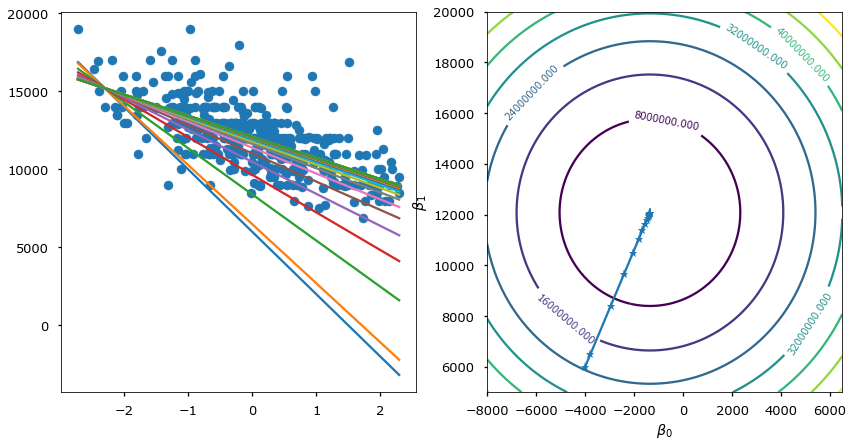

In [32]:
grad_demo(iters=105, alpha=0.08)

## Comments

* How do we set $\alpha$
* Feature scales matters
<center><img src="http://sebastianruder.com/content/images/2015/12/without_momentum.gif"></center>
* Local minima*

## Gradient descent modifications
* Stochastic gradient descent (!)
* Descent with momentum
* Adagrad

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/contours_evaluation_optimizers.gif'></th>
    <th class="tg-031e"><img src='http://sebastianruder.com/content/images/2016/09/saddle_point_evaluation_optimizers.gif'></th>
  </tr>
</table>

[Methods overview 1](http://sebastianruder.com/optimizing-gradient-descent/), [Methods overview 2](https://medium.com/towards-data-science/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f)

## Stochastic gradient descent

```{python}
1.function sgd(X, alpha, epsilon):

2. 	initialise beta 

3. 	do: 

4.        X = shuffle(X)

5.        for x in X:

6.            Beta = new_beta

7.            new_Beta = Beta - alpha*grad(x, beta)

8.	until dist(new_beta, beta) < epsilon

9.	return beta
```

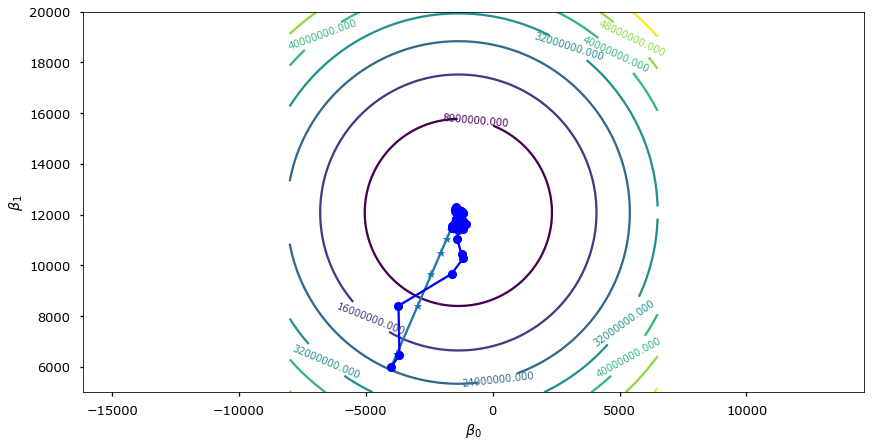

In [33]:
stoch_grad_demo(iters=105, alpha=0.08)

### Momentum

Idea: to move not only to current antigradient direction but consider previous one

$$ v_0 = 0$$
$$ v_t = \gamma v_{t - 1} + \alpha\nabla_{\beta}{L(\beta)}$$
$$ \beta = \beta - v_t$$

where
* $\gamma$ — momentum term (usually 0.9)
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{font-family:Arial, sans-serif;font-size:14px;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
.tg th{font-family:Arial, sans-serif;font-size:14px;font-weight:normal;padding:10px 5px;border-style:solid;border-width:1px;overflow:hidden;word-break:normal;}
</style>
<table class="tg">
  <tr>
    <th class="tg-031e"><img src='http://ruder.io/content/images/2015/12/without_momentum.gif'></th>
    <th class="tg-031e"><img src='http://ruder.io/content/images/2015/12/with_momentum.gif'></th>
  </tr>
</table>

 


### Adagrad 

Idea: update parameters $\beta_i$ for each feature differenly.

Denote $\frac{\partial L}{\partial \beta_i}$ on iteration $t$ as $g_{t,i}$

Vanilla gd update

$$ \beta_{t+1, i} = \beta_{t, i} - \alpha \cdot g_{t,i}$$

In Adagrad $\alpha$  is normalized wrt "size" of previous derivatives:

$$ \beta_{t+1, i} = \beta_{t, i} - \dfrac{\alpha}{\sqrt{G_{t,ii} + \varepsilon}} \cdot g_{t,i}$$

where $G_t$ is diagonal matrix with sum of squares of derivatives of $\beta_{i}$ before iteration $t$. $\varepsilon$ — is smoothing hyperparameter.

## FYI
* Zero-order methods
    * like...
* 2nd order methods
    * Newton method

# Nonlinear dependencies

## Generalization by nonlinear transformations

Nonlinearity by $x$ in linear regression may be achieved by applying
non-linear transformations to the features:

$$
x\to[\phi_{0}(x),\,\phi_{1}(x),\,\phi_{2}(x),\,...\,\phi_{M}(x)]
$$

$$
f(x)=\mathbf{\phi}(x)^{T}\beta=\sum_{m=0}^{M}\beta_{m}\phi_{m}(x)
$$

The model remains to be linear in $\beta$, so all advantages of linear
regression remain.

## Typical transformations

* $x^{i}\in[a,b]$ : binarization of feature
* $x^{i}x^{j}$ : interaction of features
* $\exp\left\{ -\gamma\left\lVert x-\tilde{x}\right\rVert ^{2}\right\} $ : closeness to reference point $\tilde{x}$ 
* $\ln x_{k}$ : the alignment of the distribution with heavy tails


In [35]:
def demo_weights():
    df = pd.read_csv('weights.csv', sep=';', index_col=0)
    
    fig, ax = plt.subplots(1,2)
    
    df.plot(x = 'body_w', y='brain_w', kind='scatter', ax=ax[0])
    for k, v in df.iterrows():
        ax[0].annotate(k, v[:2])
    # Должно получится что-то несуразное..
    
    df['log_body_w'] = np.log(df.body_w)
    df['log_brain_w'] = np.log(df.brain_w)
    df.plot(x = 'log_body_w', y='log_brain_w', kind='scatter', ax=ax[1])
    for k, v in df.iterrows():
        ax[1].annotate(k, v[2:])

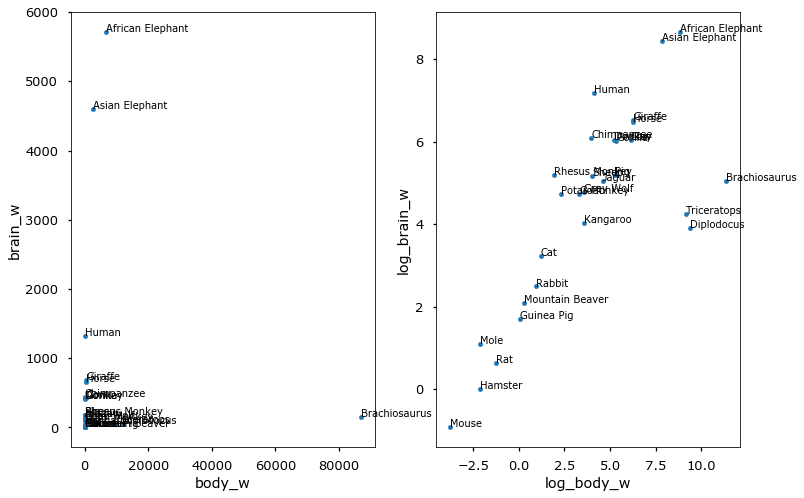

In [37]:
demo_weights()

# Regularization & restrictions

## Intuition

<center><img src=http://www.holehouse.org/mlclass/10_Advice_for_applying_machine_learning_files/Image%20[8].png></center>
[Andrew's Ng Machine Learning Class - Stanford]

## Regularization 

* Insert additional requirement for regularizer $R(\beta)$ to be small:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{\beta}
$$
* $\lambda>0$ - hyperparameter.
* $R(\beta)$ penalizes complexity of models.
$$
\begin{array}{ll}
R(\beta)=||\beta||_{1} & \mbox{Lasso regression}\\
R(\beta)=||\beta||_{2}^{2} & \text{Ridge regression}
\end{array}
$$


* Not only **accuracy** matters for the solution but also **model simplicity**!
* $\lambda$ controls complexity of the model:$\uparrow\lambda\Leftrightarrow\text{complexity}$$\downarrow$.


## Comments
* Dependency of $\beta$ from $\lambda$ for ridge (A) and LASSO (B):
<center><img src="img/regularization paths.png"></center>

* LASSO can be used for automatic feature selection.
* $\lambda$ is usually found using cross-validation on exponential grid, e.g. $[10^{-6},10^{-5},...10^{5},10^{6}]$.
* It's always recommended to use regularization because 
    * it gives smooth control over model complexity.
    * reduces ambiguity for multiple solutions case.

<center><img src=img/regul.jpg></center>


## ElasticNet
* ElasticNet:

$$
R(\beta)=\alpha||\beta||_{1}+(1-\alpha)||\beta||_{2}^{2}\to\min_{\beta}
$$
$\alpha\in(0,1)$ - hyperparameter, controlling impact of each part. 

* If two features $x^{i}$and $x^{j}$ are equal: 
    * LASSO may take only one of them
    * Ridge will take both with equal weight
        * but it doesn't remove useless features
* ElasticNet both removes useless features but gives equal weight for usefull equal features
    * good, because feature equality may be due to chance on this particular training set

## Ridge regression analytic solution

Ridge regression criterion
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda\beta^{T}\beta\to\min_{\beta}
$$

Stationarity condition can be written as:

$$
\begin{gathered}2\sum_{n=1}^{N}x_{n}\left(x_{n}^{T}\beta-y_{n}\right)+2\lambda\beta=0\\
2X^{T}(X\beta-y)+\lambda\beta=0\\
\left(X^{T}X+\lambda I\right)\beta=X^{T}y
\end{gathered}
$$

so

$$
\widehat{\beta}=(X^{T}X+\lambda I)^{-1}X^{T}y
$$

## Comments
* $X^{T}X+\lambda I$ is always non-degenerate as a sum of: 
    * non-negative definite $X^{T}X$
    * positive definite $\lambda I$


* Intuition:
    * out of all valid solutions select one giving simplest model
* Other regularizations also restrict the set of solutions.

## Different account for different features

* Traditional approach regularizes all features uniformly:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda R(\beta)\to\min_{w}
$$
* Suppose we have $K$ groups of features with indices:
$$
I_{1},I_{2},...I_{K}
$$
* We may control the impact of each group on the model by:
$$
\sum_{n=1}^{N}\left(x_{n}^{T}\beta-y_{n}\right)^{2}+\lambda_{1}R(\{\beta_{i}|i\in I_{1}\})+...+\lambda_{K}R(\{\beta_{i}|i\in I_{K}\})\to\min_{w}
$$
* $\lambda_{1},\lambda_{2},...\lambda_{K}$ can be set using cross-validation
* In practice use common regularizer but with different feature scaling.

# Different loss-functions

## Idea
* Generalize squared to arbitrary loss:
$$
\sum_{n=1}^{N}\left(x^{T}\beta-y_{n}\right)^{2}\to\min_{\beta}\qquad\Longrightarrow\qquad\sum_{n=1}^{N}\mathcal{L}(x_{n}^{T}\beta-y_{n})\to\min_{\beta}
$$

$$
\begin{array}{lll}
\textbf{LOSS} & \textbf{NAME} & \textbf{PROPERTIES}\\
\mathcal{L}(\varepsilon)=\varepsilon^{2} & \text{quadratic} & \text{differentiable}\\
\mathcal{L}(\varepsilon)=\left|\varepsilon\right| & \text{absolute} & \text{robust}\\
\mathcal{L}(\varepsilon)=\begin{cases}
\frac{1}{2}\varepsilon^{2}, & \left|\varepsilon\right|\le\delta\\
\delta\left(\left|\varepsilon\right|-\frac{1}{2}\delta\right) & \left|\varepsilon\right|>\delta
\end{cases} & \text{Huber} & \text{differentiable, robust}
\end{array}
$$

* Robust means solution is robust to outliers in the training set.


<center><img src="img/Loss functions.png"></center>

# Weighted account for observations

## Weighted account for observation

Weighted account for observations
$$
\sum_{n=1}^{N}w_{n}(x_{n}^{T}\beta-y_{n})^{2}
$$

* Weights may be:
* increased for incorrectly predicted objects 
    * algorithm becomes more oriented on error correction
* decreased for incorrectly predicted objects 
    * they may be considered outliers that break our model

## Solution for weighted regression

$$
\sum_{n=1}^{N}w_{n}\left(x_{n}^{T}\beta-y_{n}\right)^{2}\to\min_{\beta\in\mathbb{R}}
$$

Stationarity condition:
$$
\sum_{n=1}^{N}w_{n}x_{n}^{d}\left(x_{n}^{T}\beta-y_{n}\right)=0
$$

Define $\{X\}_{n,d}=x_{n}^{d}$, $W=diag\{w_{1},...x_{N}\}$. Then

$$
X^{T}W\left(X\beta-y\right)=0
$$
$$
\beta=\left(X^{T}WX\right)^{-1}X^{T}Wy
$$

## Robust regression

* Initialize $w_{1}=...=w_{N}=1/N$

* Repeat:
    * estimate regression $\widehat{y}(x)$ using observations $(x_{i},y_{i})$ with weights $w_{i}$.
    * for each $i=1,2,...N$:
        * re-estimate $\varepsilon_{i}=\widehat{y}(x_{i})-y_{i}$
        * recalculate $w_{i}=K\left(\left|\varepsilon_{i}\right|\right)$ 
    * normalize weights $w_{i}=\frac{w_{i}}{\sum_{n=1}^{N}w_{n}}$

**Comments:** $K(\cdot)$ is some *decreasing* function, repetition may be 
    * predefined number of times
    * until convergence of model parameters.

## Example

<center><img src="img/data with outliers.png"></center>